In [77]:
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0" # 할당된 gpu 번호
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.99
#session = tf.compat.v1.Session(config=config)
import json
def load_json(fname):
    with open(fname) as f:
        json_obj = json.load(f)

    return json_obj
train = load_json("train.json")
val = load_json("val.json")
test = load_json("test.json")
# for i in range(len(val)):
#     train.append(val[i])
data = train+val+test
s = []
t =[]
play_ = []
for i in range(len(data)):
    t.append(data[i]["tags"])
    s.append(data[i]["songs"])
    play_.append(data[i]["plylst_title"])
    
tags = []
for i in t:
    abc = []
    for j in i:
        abc.append(str(j))  
    tags.append(abc)
songs = []
for i in s:
    abc = []
    for j in i:
        abc.append(str(j))  
    songs.append(abc)
title = []
for i in play_:
    abc = []
    for j in i:
        abc.append(str(j))  
    title.append(abc)

tags_ = [' '.join(sentence) for sentence in tags]
songs_ = [' '.join(sentence) for sentence in songs]
title_ = [' '.join(sentence) for sentence in title]


from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b", min_df=2)
vect.fit(tags_)
len(vect.vocabulary_)

vect_s = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b",min_df=2)
vect_s.fit(songs_)
len(vect_s.vocabulary_)

vect_ti = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b",min_df=5)
vect_ti.fit(title_)
len(vect_ti.vocabulary_)

train_  = vect.transform(tags_)
train_s  = vect_s.transform(songs_)
train_ti  = vect_ti.transform(title_)

In [78]:
song_meta= load_json("song_meta.json")

genre_meta = load_json("genre_gn_all.json")

In [79]:
song_basket = []
for i in songs:
    basket = []
    for j in i:
        basket.append(int(j))
    song_basket.append(basket)

In [80]:
artist_basket=[]
for  i in songs:
    poo=[]
    for  j in i:
        poo.append(int(j))
    artist_basket.append(poo)

In [81]:
def get_genre_cross_playlist(tr_songs, song_meta):
    genre_cross_playlist = []
    for playlist in tr_songs:
        genre = []
        #print(playlist)
        for song in playlist:
            #genre.append(song)
            genre.extend(song_meta[song]["artist_name_basket"])
        genre_cross_playlist.append(genre)
    return genre_cross_playlist

b = get_genre_cross_playlist(artist_basket,song_meta)

In [82]:
artist_ = [' '.join(sentence) for sentence in b]
vect_artist = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b",min_df=3)
vect_artist.fit(artist_)
len(vect_artist.vocabulary_)
train_artist  = vect_artist.transform(artist_)

In [83]:
train_,train_s,train_artist

(<148826x12381 sparse matrix of type '<class 'numpy.int64'>'
 	with 498134 stored elements in Compressed Sparse Row format>,
 <148826x337586 sparse matrix of type '<class 'numpy.int64'>'
 	with 5593213 stored elements in Compressed Sparse Row format>,
 <148826x48164 sparse matrix of type '<class 'numpy.int64'>'
 	with 6812635 stored elements in Compressed Sparse Row format>)

In [84]:
b[0]

['The Sol',
 'Royal Bangs',
 'Honeymoon Suite',
 'Phoenix',
 'James Blunt',
 'Phoenix',
 'OneRepublic',
 'Corinne Bailey Rae',
 'Bruno Mars',
 'Christophe Mae',
 'Tomi Swick',
 'Lily Of The Valley',
 'Christophe Mae',
 'Never Shout Never',
 'Man Man',
 'Cody Simpson',
 'Red Hot Chili Peppers',
 'Boyzone',
 'All About She']

In [85]:
import random
import copy
def denoising(songs):
    a= []
    d = 1
    for _list in songs:
        sample_list = []
        if len(_list) < 9:
            a.append(_list)
            d
            continue
        for i in range(1):
            new_list = copy.deepcopy(_list)
            for i in range(int(len(new_list) *0.3)):
                new_list.remove(random.choice(new_list))
            a.append(new_list)
    return a

In [86]:
ttags = denoising(tags)
ssongs = denoising(songs)
aartist = denoising(b)

In [87]:
b[3]

['Idina Menzel',
 'Aurora',
 '김동률',
 'Ashley Tisdale',
 'Mariah Carey',
 'Mariah Carey',
 'Mariah Carey',
 'George Benson',
 '스윗소로우 (SWEET SORROW)',
 '브로콜리너마저',
 '성시경',
 '박효신',
 '이석훈',
 '서인국',
 'VIXX (빅스)',
 '제이레빗(J Rabbit)',
 '어반자카파',
 'Chickenshack',
 'Kristen Bell',
 'Agatha Lee Monn',
 'Katie Lopez',
 '성시경',
 'Ryu Miho',
 'Sakakibara Dai',
 'Ku Il Oh Trio',
 '토이',
 'Manhattan Transfer',
 '성시경',
 '성시경',
 'Sam Smith',
 'Manhattan Jazz Orchestra',
 'Nite Flyte',
 '소란 (SORAN)',
 'Stevie Wonder',
 'Andra Day',
 '멜로망스',
 '에릭남 (Eric Nam)',
 'CHEEZE (치즈)',
 'Sam Smith',
 '우효',
 '최낙타',
 '혁오 (HYUKOH)',
 '장희원',
 '이민혁',
 '정준일',
 '정미애',
 '태연 (TAEYEON)']

In [88]:
aartist[3]

['Idina Menzel',
 'Aurora',
 '김동률',
 'Ashley Tisdale',
 'Mariah Carey',
 'Mariah Carey',
 '스윗소로우 (SWEET SORROW)',
 '성시경',
 '박효신',
 '제이레빗(J Rabbit)',
 'Chickenshack',
 'Kristen Bell',
 'Katie Lopez',
 '성시경',
 'Ryu Miho',
 'Ku Il Oh Trio',
 '성시경',
 '성시경',
 'Manhattan Jazz Orchestra',
 'Nite Flyte',
 '소란 (SORAN)',
 'Stevie Wonder',
 'Andra Day',
 '멜로망스',
 'CHEEZE (치즈)',
 'Sam Smith',
 '우효',
 '최낙타',
 '혁오 (HYUKOH)',
 '장희원',
 '이민혁',
 '정준일',
 '태연 (TAEYEON)']

In [89]:
tags__ = [' '.join(sentence) for sentence in ttags]
songs__ = [' '.join(sentence) for sentence in ssongs]
title__ = [' '.join(sentence) for sentence in aartist]

train_d  = vect.transform(tags__)
train_s_d  = vect_s.transform(songs__)
train_artist_d  = vect_artist.transform(title__)

In [90]:
train_,train_s,train_artist

(<148826x12381 sparse matrix of type '<class 'numpy.int64'>'
 	with 498134 stored elements in Compressed Sparse Row format>,
 <148826x337586 sparse matrix of type '<class 'numpy.int64'>'
 	with 5593213 stored elements in Compressed Sparse Row format>,
 <148826x48164 sparse matrix of type '<class 'numpy.int64'>'
 	with 6812635 stored elements in Compressed Sparse Row format>)

In [91]:
train_d,train_s_d,train_artist_d

(<148826x12381 sparse matrix of type '<class 'numpy.int64'>'
 	with 450905 stored elements in Compressed Sparse Row format>,
 <148826x337586 sparse matrix of type '<class 'numpy.int64'>'
 	with 3978332 stored elements in Compressed Sparse Row format>,
 <148826x48164 sparse matrix of type '<class 'numpy.int64'>'
 	with 5214034 stored elements in Compressed Sparse Row format>)

In [92]:
# import scipy
# from scipy.sparse import csr_matrix
# import numpy as np
# M = csr_matrix((148826,48164), dtype=np.int64)
# M

In [93]:
import scipy
from scipy.sparse import csr_matrix
r = scipy.sparse.hstack([train_d,train_s_d,train_artist_d])
r = csr_matrix(r)
r

<148826x398131 sparse matrix of type '<class 'numpy.int64'>'
	with 9643271 stored elements in Compressed Sparse Row format>

In [94]:
r_y = scipy.sparse.hstack([train_,train_s,train_artist])
r_y = csr_matrix(r_y)
r_y

<148826x398131 sparse matrix of type '<class 'numpy.int64'>'
	with 12903982 stored elements in Compressed Sparse Row format>

In [95]:
# train_data = r[:int(0.9*r.shape[0])]
# val_data = r[int(0.9*r.shape[0]):]
# train_data,val_data

In [96]:
len(train),len(val),len(test)

(115071, 23015, 10740)

In [97]:
# train_data_y = r_y[:int(0.9*r.shape[0])]
# val_data_y = r_y[int(0.9*r.shape[0]):]
# train_data_y,val_data_y

In [98]:
val_x = r[115071:115071+23015]
val_y = r_y[115071:115071+23015]
val_x,val_y

(<23015x398131 sparse matrix of type '<class 'numpy.int64'>'
 	with 740017 stored elements in Compressed Sparse Row format>,
 <23015x398131 sparse matrix of type '<class 'numpy.int64'>'
 	with 975019 stored elements in Compressed Sparse Row format>)

In [99]:
# train_genre = genre_[:int(0.8*r.shape[0])]
# val_genre = genre_[int(0.8*r.shape[0]):]

In [100]:
# train_data, train_genre

In [101]:
# X,val_data,val_genre

In [102]:
# train_s,train_artist,156348+48164

In [103]:
# import scipy
# from scipy.sparse import csr_matrix
# r_tt = scipy.sparse.hstack([train_s,train_artist])
# r_tt= csr_matrix(r_tt)
# r_tt


In [104]:
# r_tt
# train_data = r_tt[:int(0.9*r.shape[0])]
# val_data = r_tt[int(0.9*r.shape[0]):]

In [105]:
# train_data,val_data

In [106]:
val
t_val = []
s_val = []
play_val = []
for i in range(len(val)):
    t_val.append(val[i]["tags"])
    s_val.append(val[i]["songs"])
    play_val.append(val[i]["plylst_title"])

songs_val = []
for i in s_val:
    abc = []
    for j in i:
        abc.append(str(j))  
    songs_val.append(abc)
songs_v = [' '.join(sentence) for sentence in songs_val]
train_s_val_data  = vect_s.transform(songs_v)

In [107]:
artist_basket_val=[]
for  i in songs_val:
    poo=[]
    for  j in i:
        poo.append(int(j))
    artist_basket_val.append(poo)

b_val = get_genre_cross_playlist(artist_basket_val,song_meta)

In [108]:
artist_val_list = [' '.join(sentence) for sentence in b_val]
train_artist_vval  = vect_artist.transform(artist_val_list)

In [109]:
train_s_val_data,train_artist_vval

(<23015x337586 sparse matrix of type '<class 'numpy.int64'>'
 	with 399102 stored elements in Compressed Sparse Row format>,
 <23015x48164 sparse matrix of type '<class 'numpy.int64'>'
 	with 549591 stored elements in Compressed Sparse Row format>)

In [110]:
import scipy
from scipy.sparse import csr_matrix
predict_val = scipy.sparse.hstack([train_s_val_data,train_artist_vval])
predict_val = csr_matrix(predict_val)
predict_val

<23015x385750 sparse matrix of type '<class 'numpy.int64'>'
	with 948693 stored elements in Compressed Sparse Row format>

In [111]:
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, Embedding, Flatten, add,Concatenate
from keras.models import Model

def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''
    users_items_matrix  = X
    #print(content_info.shape)
    #print(users_items_matrix.shape)
    # Input
    input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
#     input_content = Input(shape=(content_info.shape[1],), name='Itemcontent')
    
    # Encoder
    # -----------------------------
    enc = Dense(256, activation='sigmoid', name='EncLayer1')(input_layer)

#     # Content Information
#     x_content = Embedding(255, 50, input_length=content_info.shape[1])(input_content)
#     x_content = Flatten()(x_content)
#     x_content = Dense(128, activation='selu', 
#                                name='ItemLatentSpace')(x_content)
    # Latent Space
    # -----------------------------
#     lat_space = Dense(128, activation='sigmoid', name='UserLatentSpace')(enc)
    
#     lat_space= Concatenate(name='LatentSpace')([lat_space, x_content])
    lat_space = Dropout(0.25, name='Dropout')(enc) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(256, activation='sigmoid', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(users_items_matrix.shape[1], activation='sigmoid', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

In [112]:
from keras.utils import multi_gpu_model
# Build model
X = r
model = autoEncoder(X)
#model = multi_gpu_model(model, gpus=2)
#model = multi_gpu_model(model, gpus=2)
model.compile(optimizer = Adam(lr=0.01), loss='binary_crossentropy')
    
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
UserScore (InputLayer)       (None, 398131)            0         
_________________________________________________________________
EncLayer1 (Dense)            (None, 256)               101921792 
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
DecLayer1 (Dense)            (None, 256)               65792     
_________________________________________________________________
UserScorePred (Dense)        (None, 398131)            102319667 
Total params: 204,307,251
Trainable params: 204,307,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
MODEL_SAVE_FOLDER_PATH = '/home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto2/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)
hist = model.fit(x=r, y=r_y,
                 validation_data=(val_x, val_y),
                  epochs=30,
                  batch_size=32,
                  shuffle=True,
                  callbacks=[cb_checkpoint])

Train on 148826 samples, validate on 23015 samples
Epoch 1/30
148826/148826 [==============================] - 605s 4ms/step - loss: 0.0027 - val_loss: 0.0013

Epoch 00001: val_loss improved from inf to 0.00132, saving model to /home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto2/01-0.0013.hdf5
Epoch 2/30
148826/148826 [==============================] - 604s 4ms/step - loss: 0.0026 - val_loss: 0.0014

Epoch 00002: val_loss did not improve from 0.00132
Epoch 3/30
148826/148826 [==============================] - 601s 4ms/step - loss: 0.0027 - val_loss: 0.0014

Epoch 00003: val_loss did not improve from 0.00132
Epoch 4/30
148826/148826 [==============================] - 603s 4ms/step - loss: 0.0028 - val_loss: 0.0014

Epoch 00004: val_loss did not improve from 0.00132
Epoch 5/30
148826/148826 [==============================] - 599s 4ms/step - loss: 0.0028 - val_loss: 0.0014

Epoch 00005: val_loss did not improve from 0.00132
Epoch 6/30
148826/148826 [==============================] - 

In [ ]:
MODEL_SAVE_FOLDER_PATH = '/home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto2/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.6f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)
hist1 = model.fit(x=r, y=r_y,
                 validation_data=(val_x, val_y),
                  epochs=60,
                  batch_size=32,
                  shuffle=True,
                  callbacks=[cb_checkpoint])

In [58]:
pwd

'/home/yjkim/new_melon_test/youngwook-melon/res/cmf'

In [ ]:
model.load_weights("/home/yjkim/new_melon_test/youngwook-melon/res/cmf/auto2/55-0.0006.hdf5")

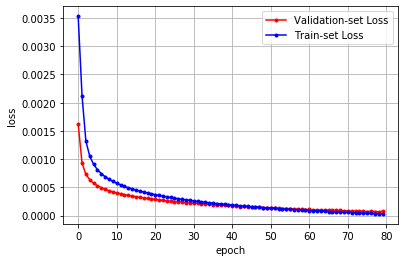

In [59]:
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [69]:
tname = vect.get_feature_names()
def recommender_for_user(user_id, interact_matrix,  topn = 10):

    pred_scores = interact_matrix.loc[user_id].values
    #print(pred_scores,len(pred_scores),df.columns[57061:],len(df.columns[57061:]))
    df_scores   = pd.DataFrame({'content_id': tname, 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('content_id')\
                    .sort_values('score', ascending=False)\
                    .head(topn)[["score"]]
    return df_rec[df_rec.score > 0]
fname = vect_s.get_feature_names()
def recommender_for_user_s(user_id, interact_matrix,  topn = 100):
    
    pred_scores = interact_matrix.loc[user_id].values
    #print(pred_scores)
    #print(list(song_predict)[0:10])
    df_scores   = pd.DataFrame({'content_id': fname, 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('content_id')\
                    .sort_values('score', ascending=False)\
                    .head(topn)[["score"]]
    return df_rec[df_rec.score > 0]
def select_top_n(names, scores, topn):
    #return sorted(enumerate(names), key=lambda item: scores[item[0]], reverse=True)
    return list(zip(*sorted(enumerate(names), key=lambda item: scores[item[0]], reverse=True)[:topn]))[1]

In [72]:
import copy
val_copy = copy.deepcopy(val)
len(fname)

187516

In [18]:
val_train_ = train_[115071:115071+23015]
val_train_s = train_s[115071:115071+23015]
r_v = scipy.sparse.hstack([val_train_,val_train_s])
r_v = csr_matrix(r_v)


In [27]:
val_train_s[2],val_train_[2]

(<1x156348 sparse matrix of type '<class 'numpy.int64'>'
 	with 9 stored elements in Compressed Sparse Row format>,
 <1x5251 sparse matrix of type '<class 'numpy.int64'>'
 	with 0 stored elements in Compressed Sparse Row format>)

In [25]:
r_v[2]

<1x161599 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [70]:
val_y,val_x,train_d,train_s_d,train_artist_d,len(fname),len(tname)

(<23015x248061 sparse matrix of type '<class 'numpy.int64'>'
 	with 949877 stored elements in Compressed Sparse Row format>,
 <23015x248061 sparse matrix of type '<class 'numpy.int64'>'
 	with 721214 stored elements in Compressed Sparse Row format>,
 <148826x12381 sparse matrix of type '<class 'numpy.int64'>'
 	with 450909 stored elements in Compressed Sparse Row format>,
 <148826x187516 sparse matrix of type '<class 'numpy.int64'>'
 	with 3727919 stored elements in Compressed Sparse Row format>,
 <148826x48164 sparse matrix of type '<class 'numpy.int64'>'
 	with 5214650 stored elements in Compressed Sparse Row format>,
 187516,
 12381)

In [73]:
import numpy as np
import pandas as pd
from tqdm import tqdm
for i,check in tqdm(enumerate(model.predict(val_y))):
    new_matrix = (val_y[i].toarray()==0)*(check - np.min(check))
    #val_copy[i]["songs"] = select_top_n(names = fname, scores=new_matrix[0,:], topn=100)
    
    
    song_predict = pd.DataFrame(new_matrix[:,12381:12381+187516])
    #print("Model prediction00: {}s".format(time.time() - start_time))
    #start_time = time.time()

    song_predict.columns=fname
    #print("Model prediction01: {}s".format(time.time() - start_time))
    #start_time = time.time()


    #print("Model prediction2: {}s".format(time.time() - start_time))
    #start_time = time.time()

    tags_predict = pd.DataFrame(new_matrix[:,:12381])
    tags_predict.columns=tname
    #print(recommender_for_user(user_id = i, interact_matrix = df)["score"].index.tolist())
    #print(val_[i]["songs"])
    val_copy[i]["tags"] = recommender_for_user(user_id = 0, interact_matrix = tags_predict)["score"].index.tolist()
    val_copy[i]["songs"] = recommender_for_user_s(user_id = 0, interact_matrix = song_predict)["score"].index.tolist()
#     print("Model prediction3: {}s".format(time.time() - start_time))
#     start_time = time.time()

#     print(val[i]["songs"] == top_songs, top_songs)

23015it [1:17:51,  4.93it/s]


In [75]:
import json
def load_json(fname):
    with open(fname, encoding="UTF-8") as f:
        json_obj = json.load(f)

    return json_obj


#dap2 = load_json("2.json")
dap50 = load_json("dab.json")

In [76]:
for i in range(len(dap50)):
    dap50[i]["songs"] = val_copy[i]["songs"]
    dap50[i]["tags"] = val_copy[i]["tags"]
    
for i in range(len(dap50)):
    for j in range(len(dap50[i]["songs"])):
        dap50[i]["songs"][j] = int(dap50[i]["songs"][j])
        
        
with open("resu_t.json", "w") as outfile:
        json.dump(dap50, outfile, ensure_ascii=False, indent=4)

In [74]:
val_copy[0]

{'tags': ['팝', 'ost', '락', '디즈니', '운동', '여행', '겨울왕국', '산책', '겨울', '알앤비'],
 'id': 118598,
 'plylst_title': '',
 'songs': ['703323',
  '422438',
  '623047',
  '569715',
  '394031',
  '638488',
  '157900',
  '413459',
  '207912',
  '385871',
  '551157',
  '285275',
  '430476',
  '387642',
  '322215',
  '283939',
  '689366',
  '516376',
  '78983',
  '545553',
  '66475',
  '455806',
  '427106',
  '268669',
  '412305',
  '545816',
  '472374',
  '220100',
  '396028',
  '328908',
  '292859',
  '39436',
  '381851',
  '562903',
  '259770',
  '567490',
  '545983',
  '341264',
  '151704',
  '533646',
  '625875',
  '125214',
  '654428',
  '567076',
  '447762',
  '225631',
  '648022',
  '690767',
  '668694',
  '40025',
  '590972',
  '460089',
  '494552',
  '249378',
  '21512',
  '203153',
  '283803',
  '307938',
  '491808',
  '233076',
  '540321',
  '578523',
  '555986',
  '258135',
  '297918',
  '619259',
  '257929',
  '467269',
  '26908',
  '10690',
  '574308',
  '380092',
  '242188',
  '505518',


In [58]:
dap50[0]

{'id': 118598,
 'songs': [373313,
  151080,
  275346,
  696876,
  165237,
  525935,
  457812,
  371709,
  170292,
  438915,
  162569,
  161136,
  310892,
  608704,
  295701,
  127698,
  269427,
  592526,
  110696,
  368214,
  24386,
  104455,
  61612,
  151421,
  416023,
  320447,
  19606],
 'tags': ['OST',
  '디즈니',
  '애니메이션',
  '픽사',
  '알라딘',
  '겨울왕국',
  '인어공주',
  '디즈니OST',
  '라푼젤',
  '미녀와야수']}

In [14]:
song_meta[0]

{'song_gn_dtl_gnr_basket': ['GN0901'],
 'issue_date': '20140512',
 'album_name': '불후의 명곡 - 7080 추억의 얄개시대 팝송베스트',
 'album_id': 2255639,
 'artist_id_basket': [2727],
 'song_name': 'Feelings',
 'song_gn_gnr_basket': ['GN0900'],
 'artist_name_basket': ['Various Artists'],
 'id': 0}

In [8]:
artist_tabel = get_artist_table(song_basket,song_meta)

KeyboardInterrupt: 

In [25]:
genre_tabel, error = get_genre_table(song_basket, song_meta, genre_meta)

In [27]:
pdgenre_

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,11,0,1,3,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,14,0,1,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,0,3,0,0,43,42,0,30,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148822,36,36,0,0,0,28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
len(pdgenre_.iloc[0][pdgenre_.iloc[0] > 0])

24

In [39]:
import scipy
from scipy.sparse import csr_matrix
genre_ = scipy.sparse.csr_matrix(pdgenre_.values)

In [40]:
genre_[0]

<1x255 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [15]:
songs[0]

['525514',
 '129701',
 '383374',
 '562083',
 '297861',
 '139541',
 '351214',
 '650298',
 '531057',
 '205238',
 '706183',
 '127099',
 '660493',
 '461973',
 '121455',
 '72552',
 '223955',
 '324992',
 '50104']

In [16]:
len(song_basket)

148826

In [1]:
artist_tabel

NameError: name 'artist_tabel' is not defined

In [18]:
len(songs[0])

19

In [19]:
len(a[0])

14

<1x156348 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [21]:
train_s[1]

<1x156348 sparse matrix of type '<class 'numpy.int64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [25]:
b[-1]

['Jason Mraz',
 'Jason Mraz',
 'Jason Mraz',
 'Jason Mraz',
 'Jason Mraz',
 'Jason Mraz',
 'Jason Mraz',
 'Jason Mraz',
 'Jason Mraz',
 'Jason Mraz']

In [60]:
1

1

In [ ]:
def get_genre_table(tr_songs, song_meta, genre_list):
    def check_song_genre(song, genre_list):
        # print(song)
        genres = []
        error_data = []
        genres.extend(song["song_gn_gnr_basket"])
        genres.extend(song["song_gn_dtl_gnr_basket"])
        for genre in genres:
            if genre not in genre_list:
                error_data.append({"type": "Genre is not exist", "data": song})
        if error_data:
            return False, error_data
        return True, None
    tr_genre = []
    error_data = []
    for playlist in tr_songs:
        genre = []
        for song in playlist:
            status, data = check_song_genre(song_meta[song], genre_list)
            if status == False:
                error_data.append(data)
                genre.extend(song_meta[song]["song_gn_gnr_basket"])
                continue
            genre.extend(song_meta[song]["song_gn_gnr_basket"])
            genre.extend(song_meta[song]["song_gn_dtl_gnr_basket"])
        tr_genre.append(genre)
    # init each genre table in playlist
    table_list = []
    for i in range(len(tr_songs)):
        table = {}
        for genre_id in genre_list:
            table[genre_id] = 0
        # add GN9000 value
        table["GN9000"] = 0
        table_list.append(table)
    # count genre
    for i, genre in enumerate(tr_genre):
        for genre_id in genre:
            table_list[i][genre_id] += 1
        table_list[i] = table_list[i].values()
    return table_list, error_data
def get_artist_table(tr_songs, song_meta):
    table_list = []
    artist_table = {}
    for song in song_meta:
        for artist_id in song["artist_id_basket"]:
            artist_table[artist_id] = 0
    artist_list = artist_table.keys()
    tr_artist = []
    for playlist in tr_songs:
        artist = []
        for song in playlist:
            artist.extend(song_meta[song]["artist_id_basket"])
        tr_artist.append(artist)
    import copy
    table_list = []
    for _ in range(len(tr_songs)):
        table_list.append(copy.deepcopy(artist_table))
    for i, artist in enumerate(tr_artist):
        for artist_id in artist:
            table_list[i][artist_id] += 1
        table_list[i] = table_list[i].values()
    return table_list

In [ ]:
import pandas as pd
pdgenre_ =pd.DataFrame(genre_tabel)

In [1]:
1

1

In [ ]:
1